<a href="https://colab.research.google.com/github/varshini2308/Mini-Project/blob/main/BotnetAutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import os
from tensorflow.keras import layers, losses, Sequential
from tensorflow.keras.callbacks import EarlyStopping

**Loading CTU-13 dataset**

In [ ]:
normal_traffic_dataset = pd.read_csv('/content/CTU13_Normal_Traffic.csv')

attack_traffic_dataset = pd.read_csv('/content/CTU13_Attack_Traffic.csv')

#combine normal traffic and attack traffic dataset
dataset = pd.concat([normal_traffic_dataset, attack_traffic_dataset], ignore_index=True)

X = dataset.drop(columns=['Label'])
y = dataset['Label']

print(dataset.head())

   Unnamed: 0  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0           0            891             0             2                0   
1           1          20835             0             2                0   
2           2            545             0             2                0   
3           3          83892             0             2                0   
4           4            608             0             2                0   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0              348                0                0               0.0   
1              266                0                0               0.0   
2              442                0                0               0.0   
3              194                0                0               0.0   
4              480                0                0               0.0   

   Fwd Pkt Len Std  ...  Fwd Act Data Pkts  Active Mean  Active Std  \
0              0.0  .

**Exploratory Data Analysis**

In [ ]:
dataset.describe()

,Unnamed: 0,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,92212.000000,9.221200e+04,92212.000000,92212.000000,9.221200e+04,9.221200e+04,92212.000000,92212.000000,92212.000000,92212.000000,...,92212.000000,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,92212.000000
mean,23617.189129,1.070781e+07,10.943370,12.974233,5.600684e+03,1.021176e+04,77.677287,6.762699,22.974344,25.156811,...,5.779454,4.351079e+05,7.777843e+04,5.598308e+05,3.854448e+05,3.928015e+06,4.906831e+05,4.354137e+06,3.542860e+06,0.421832
std,14241.877212,2.708038e+07,249.027375,188.163610,2.857600e+05,2.096956e+05,227.595074,33.400015,76.539275,81.240567,...,204.037943,1.516574e+06,7.175262e+05,1.983055e+06,1.416148e+06,1.200553e+07,3.847780e+06,1.334522e+07,1.143824e+07,0.493855
min,0.000000,1.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,11526.750000,2.182200e+04,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,23054.000000,7.014100e+04,1.000000,2.000000,0.000000e+00,1.160000e+02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,34581.000000,6.500053e+06,5.000000,3.000000,3.100000e+01,2.520000e+02,30.000000,0.000000,15.500000,0.000000,...,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
max,53315.000000,1.200000e+08,15123.000000,21933.000000,2.226106e+07,3.098852e+07,2920.000000,2442.000000,2442.000000,842.931393,...,15123.000000,1.082142e+08,5.927926e+07,1.082142e+08,1.082142e+08,1.199400e+08,7.695603e+07,1.199400e+08,1.199400e+08,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92212 entries, 0 to 92211
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         92212 non-null  int64  
 1   Flow Duration      92212 non-null  int64  
 2   Tot Fwd Pkts       92212 non-null  int64  
 3   Tot Bwd Pkts       92212 non-null  int64  
 4   TotLen Fwd Pkts    92212 non-null  int64  
 5   TotLen Bwd Pkts    92212 non-null  int64  
 6   Fwd Pkt Len Max    92212 non-null  int64  
 7   Fwd Pkt Len Min    92212 non-null  int64  
 8   Fwd Pkt Len Mean   92212 non-null  float64
 9   Fwd Pkt Len Std    92212 non-null  float64
 10  Bwd Pkt Len Max    92212 non-null  int64  
 11  Bwd Pkt Len Min    92212 non-null  int64  
 12  Bwd Pkt Len Mean   92212 non-null  float64
 13  Bwd Pkt Len Std    92212 non-null  float64
 14  Flow Byts/s        92212 non-null  float64
 15  Flow Pkts/s        92212 non-null  float64
 16  Flow IAT Mean      922

**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(69159, 58)
(23053, 58)
(69159,)
(23053,)


In [ ]:
class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Sequential([
            layers.Dense(58, activation="relu"),
            layers.Dense(86, activation="relu"),
            layers.Dense(57, activation="relu"),
            layers.Dense(37, activation="relu"),
            layers.Dense(28, activation="relu")
        ])
        self.decoder = Sequential([
            layers.Dense(37, activation="relu"),
            layers.Dense(57, activation="relu"),
            layers.Dense(86, activation="relu"),
            layers.Dense(58, activation="sigmoid")
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(X_train)

ae = Autoencoder()
ae.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=1e-9,
    patience=5,
    verbose=1,
    mode='auto'
)
history = ae.fit(
    x=x,
    y=x,
    epochs=100,
    validation_split=0.3,
    shuffle=True,
    callbacks=[monitor]
)

# Calculate training loss
training_loss = losses.mse(x, ae(x))
threshold = np.mean(training_loss) + np.std(training_loss)

Epoch 1/100
1513/1513 [==============================] - 9s 5ms/step - loss: 0.0289 - val_loss: 0.0284
Epoch 2/100
1513/1513 [==============================] - 5s 3ms/step - loss: 0.0284 - val_loss: 0.0284
Epoch 3/100
1513/1513 [==============================] - 6s 4ms/step - loss: 0.0284 - val_loss: 0.0284
Epoch 4/100
1513/1513 [==============================] - 5s 4ms/step - loss: 0.0284 - val_loss: 0.0284
Epoch 5/100
1513/1513 [==============================] - 7s 5ms/step - loss: 0.0284 - val_loss: 0.0284
Epoch 6/100
1513/1513 [==============================] - 5s 3ms/step - loss: 0.0284 - val_loss: 0.0284
Epoch 6: early stopping


In [ ]:
print(x.shape)

(73769, 58)


**Model Evaluation**

In [ ]:
reconstructed_outputs = ae.predict(x)

# Calculate the reconstruction error (Mean Squared Error)
mse = np.mean(np.square(x - reconstructed_outputs))

print("Mean Squared Error (MSE):", mse)


2162/2162 [==============================] - 4s 2ms/step
Mean Squared Error (MSE): 0.02839539415915468


**Plot the Loss Curve**

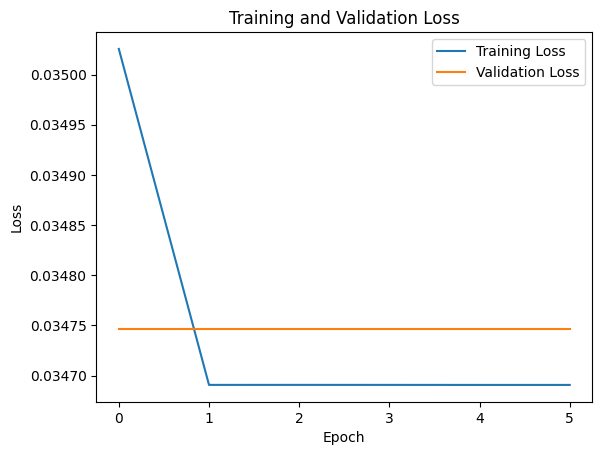

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss curves
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
